## Sentiment Classification on movie reviews

### Data Description<br>
<li><b>Review - </b> Raw data of IMDd Movie review.</li>
<li><b>Sentiment - </b> Sentiment of movie review (positive or negative)</li>

In [66]:
# Importing the required libraries
import pandas as pd
import numpy as np

### Loading the dataset 

In [67]:
movie_review = pd.read_csv(r"c:IMDB_Dataset.csv")
movie_review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [68]:
# checking the descriptive statistics
movie_review.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


### Data Preprocessing

In [69]:
# data cleaning
movie_review['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [70]:
# converting the text to lowercase
def convert_to_lowercase(text):
    return text.lower()

movie_review['review_text'] = movie_review['review'].apply(lambda char: convert_to_lowercase(char))

In [71]:
import re

# defining function to remove tags from text
def remove_br_tags(text):
    # Define pattern to match "<br /><br />" combinedly
    pattern = r'<br\s*/?><br\s*/?>'
    # Remove "<br /><br />" using regex
    cleaned_text = re.sub(pattern, ' ', text)
    return cleaned_text

# applying that function in dataset and creating new column
movie_review['review_text'] = movie_review['review_text'].apply(lambda br_tag: remove_br_tags(br_tag))

In [72]:
import re

# removing the special characters from review text
def remove_special_characters(text):
    # Define pattern to match special characters and punctuation
    pattern = r'[^a-zA-z0-9\s]'
    # Remove special characters using regex
    text = re.sub(pattern, '', text)
    return text

movie_review['review_text'] = movie_review['review_text'].apply(lambda spl_char: remove_special_characters(spl_char))

In [73]:
# Removing the un-necessary white spaces from the text
def remove_extra_whitespace(text):
    # Remove extra whitespace using regex
    text = re.sub(' +', ' ', text)
    return text.strip()

movie_review['review_text'] = movie_review['review_text'].apply(lambda extra_space: remove_extra_whitespace(extra_space))

In [74]:
# Removing the numbers from the review
def remove_numbers(text):
    # Define pattern to match numbers
    pattern = r'\d+'
    # Remove numbers using regex
    text = re.sub(pattern, '', text)
    return text

movie_review['review_text'] = movie_review['review_text'].apply(lambda remv_num: remove_numbers(remv_num))

In [75]:
import nltk
from nltk.corpus import stopwords

# downloading stopwords to remove from the review text
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# defining to remove stopwords which doesn't carry any meaning.
def remove_stopwords(text):
    # Tokenize text
    tokens = text.split()
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]
    # Reconstruct text
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

movie_review['review_text'] = movie_review['review_text'].apply(lambda remv_stpwrds: remove_stopwords(remv_stpwrds))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

# getting the commmon words from removing thier suffixes based on meaning of sentence.
def lemmatize_text(text):
    tokens = text.split()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

movie_review['review_text'] = movie_review['review_text'].apply(lambda lemm: lemmatize_text(lemm))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dines\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
import scipy.sparse as sp

# Feature Extraction - TF-IDF
tfidf_vectorizer = TfidfVectorizer()
preprocessed_reviews = movie_review['review_text'].values

# fit the preprocess text to vectors
tfidf_features = tfidf_vectorizer.fit(preprocessed_reviews)


In [78]:
tfidf_features

TfidfVectorizer()

### Model building

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# separating the movie reviews and sentiments(target) column in different variables and splitting the data
y = movie_review['sentiment'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(movie_review['review_text'].values, y, test_size=0.2, random_state=42)

# checking the shape of data after splitting
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000,) (40000,)
(10000,) (10000,)


In [80]:
# Intializing the vectorizer and learns from train data. 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectors = TfidfVectorizer().fit(X_train)

In [81]:
# transform the train data by the pattern learned by the vecotized model
X_train_vectorizer = tfidf_vectors.transform(X_train)

In [82]:
X_train_vectorizer.shape

(40000, 132567)

### Logistic Regression

In [83]:
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter=1000)  # Initialize the model (you can choose any other model)
model.fit(X_train_vectorizer, y_train)  # Train the model on the training data

# Predict on the testing set
y_pred = model.predict(tfidf_vectors.transform(X_test))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8958


#### Evaluating the model metrics and graphs

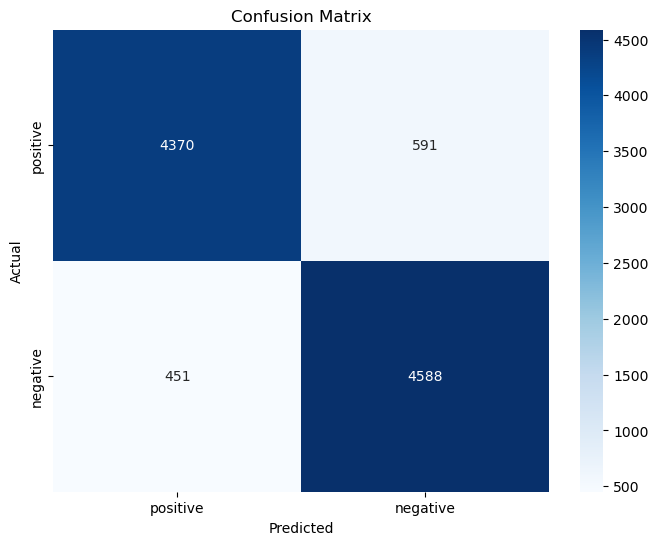


Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Precision Score: 0.8858853060436378
Recall Score: 0.9104981147052986

F1 Score: 0.898023096496379


In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Assuming y_test and y_pred are the true labels and predicted labels respectively

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# Define class labels
class_labels = ['positive', 'negative']

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(cr)

# Precision Score
precision = precision_score(y_test, y_pred, pos_label='positive')
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, y_pred, pos_label='positive')
print("Recall Score:", recall)

# F1 Score
f1 = f1_score(y_test, y_pred, pos_label='positive')
print("\nF1 Score:", f1)


### RandomForestClassifier

In [86]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

# Initialize and train a logistic regression model
rndm_model = RandomForestClassifier()  # Initialize the model (you can choose any other model)
rndm_model.fit(X_train_vectorizer, y_train)  # Train the model on the training data

# Predict on the testing set
rndm_y_pred = rndm_model.predict(tfidf_vectors.transform(X_test))

# Evaluate the model
accuracy = accuracy_score(y_test, rndm_y_pred)
print("Accuracy:", accuracy)


#### Evaluating the random forest classifier model metrics

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score

# Assuming y_test and y_pred are the true labels and predicted labels respectively

# Confusion Matrix
cm = confusion_matrix(y_test, rndm_y_pred)
# Define class labels
class_labels = ['positive', 'negative']

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_test, rndm_y_pred)
print("\nClassification Report:")
print(cr)

# Precision Score
precision = precision_score(y_test, rndm_y_pred, pos_label='positive')
print("Precision Score:", precision)

# Recall Score
recall = recall_score(y_test, rndm_y_pred, pos_label='positive')
print("Recall Score:", recall)

# F1 Score
f1 = f1_score(y_test, rndm_y_pred, pos_label='positive')
print("\nF1 Score:", f1)


### Model Evaluation on unseen data

In [87]:
text_data = input()#['The movie is very bad and emotionally sad at the climax of the movie']
print(model.predict(tfidf_vectors.transform([text_data]))[0])
print(model.predict_proba(tfidf_vectors.transform([text_data]))[0])

very bad no proper vfx
negative
[0.84771815 0.15228185]


### Serializing the model and vectors to local file

In [88]:
import pickle

# Assuming 'model' is your trained machine learning model object
# Dumping the model as a pickle file
with open('imdb_sentiment_logistic.pkl', 'wb') as f:
    pickle.dump(model,f)
    
with open('vectors_trained.pkl', 'wb') as file:
    pickle.dump(tfidf_vectors,file)


### Deserializing the model and vectors from local file 

In [5]:
import pickle
with open('imdb_sentiment_logistic.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
    
with open('vectors_trained.pkl', 'rb') as file:
    loaded_vectors = pickle.load(file)
    

### Taking the movie review input from user to predict the sentiment

In [12]:
# Movie review input
X_new = input()

 Director M. Night Shyamalan delivers a convoluted and poorly executed storyline, filled with wooden performances and lackluster special effects. The film's pacing is sluggish, and crucial character development is sacrificed in favor of exposition-heavy dialogue. Fans of the original series will be left feeling betrayed by this lackluster adaptation, which squanders the potential for a compelling live-action interpretation.


### using the loaded model and vectors to predict the unseen user input

In [16]:
# Checking the sentimnt of input
print("Sentiment of user input: ",loaded_model.predict(loaded_vectors.transform([X_new]))[0].capitalize())

# checking the confidence of sentiment from user input
print("Confidence score of movie review input: ",loaded_model.predict_proba(loaded_vectors.transform([X_new]))[0])

Sentiment of user input:  Negative
Confidence score of movie review input:  [0.7894328 0.2105672]
